# Pymaceuticals Inc.
---

### Analysis

- In this study, the bar graph demonstrated that the Drug Regimen Capomulin has the largest number of mice with a count of 230, while Zoniferol has the smallest number of mice with a count of 182. After removing duplicates, the total number of mice was found to be 248, with 124 female mice and 125 male mice.

The correlation between mouse weight and average tumor volume was determined to be 0.84, which represents a strong positive correlation. This means that as mouse weight increases, the average tumor volume also increases. The regression analysis was performed to understand the effect of mouse weight on the average tumor volume. The analysis found that 70% of the variation in the response variable (average tumor volume) could be explained by the variation in the independent variable (mouse weight), with an R-squared value of 0.70. This indicates that the model is fairly good at predicting the average tumor volume based on mouse weight.
 

In [48]:
# Dependencies and Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [49]:
# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_df= pd.merge(mouse_metadata, study_results) 

# Display the data table for preview
pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
#Look at the Data
pyma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [51]:
#check data types

mouse_metadata.nunique()

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64







# Checking the number of mice.



In [52]:

#check number of mice
mice = len(mouse_metadata)
mice

249

In [53]:
#Find the duplicates from each data set

#Mouse
duplicates = mouse_metadata[mouse_metadata.duplicated()]
print(duplicates)

#Study
duplicates = study_results[study_results.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137     g989          0                45.0                 0


In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id_number = pyma_df[pyma_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_id_number

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_id_number)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


### Dropped data from study_results 

In [56]:
#what does data look like before 
pyma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [57]:
#Drop duplicates from mouse data
clean_mouse = mouse_metadata[mouse_metadata["Mouse ID"] != "g989"]

#Drop duplicates from study results
clean_study = study_results[study_results["Mouse ID"] != "g989"]

In [58]:
# Create a clean DataFrame 
pyma_df_clean = pd.merge(clean_mouse,clean_study)
pyma_df_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
pyma_df_clean.nunique()



Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

# Summary Statistics

In [60]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen = pyma_df_clean.groupby("Drug Regimen")
print(drug_regimen)

drug_regimen.describe()



Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          148.0  27.135135  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [109]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# Group the data by the "Drug Regimen" column
drug_regimen = pyma_df_clean.groupby("Drug Regimen")


# Calculate the mean, median, min, max, and standard deviation for each drug regimen
mean = drug_regimen["Tumor Volume (mm3)"].mean()
median = drug_regimen["Tumor Volume (mm3)"].median()
variance = drug_regimen["Tumor Volume (mm3)"].var()
stdev = drug_regimen["Tumor Volume (mm3)"].std()
sem = drug_regimen["Tumor Volume (mm3)"].sem()


#Create dictionary to hold vars
data = {"Mean":mean,
       "Median":median,
        "Variance":variance,
        "Stdev": stdev,
        "SEM": sem}


# Combine the results into a single DataFrame
summary_stats = pd.DataFrame(data)

# Rename the columns for clarity
# summary_stats = ["Mean", "Median","Variance", "Std Dev","SEM"]

# summary_stats = pd.DataFrame(summary_stats)
summary_stats

,Mean,Median,Variance,Stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# #Create data frame Summary Stats

# tumor_vol = "Tumor Volume (mm3) "
    
# # Calculate the mean, median, min, max, and standard deviation for each drug regimen
# mean = pyma_df_clean["Tumor Volume (mm3)"].mean()
# median = pyma_df_clean["Tumor Volume (mm3)"].median()
# variance = pyma_df_clean["Tumor Volume (mm3)"].var()
# stdev = pyma_df_clean["Tumor Volume (mm3)"].std()
# sem = pyma_df_clean["Tumor Volume (mm3)"].sem()

# summary_stats = pd.DataFrame({
#     "mean": tumor_vol.mean(),
#     "median": tumor_vol.median(),
#     "variance": tumor_vol.var(),
#     "std deviation": tumor_vol.std(),
#     "SEM": tumor_vol.sem()
# })
# summary_stats

In [63]:
# Calculate the mean, median, min, max, and standard deviation for each drug regimen
mean = pyma_df_clean["Tumor Volume (mm3)"].mean()
median = pyma_df_clean["Tumor Volume (mm3)"].median()
variance = pyma_df_clean["Tumor Volume (mm3)"].var()
stdev = pyma_df_clean["Tumor Volume (mm3)"].std()
sem = pyma_df_clean["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    "mean": mean,
    "median": median,
    "variance": variance,
    "std deviation": stdev,
    "SEM": sem
}, index=[0])


summary_stats

,mean,median,variance,std deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [64]:
# Using the aggregation method, produce the same summary statistics in a single line

pyma_df_clean["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])


mean      50.435293
median    48.933454
var       79.462907
std        8.914197
sem        0.205591
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

In [65]:
#series using drug regimen
mice_count = pyma_df_clean["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

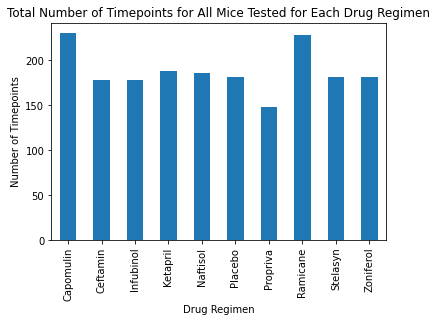

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


total_timepoints = pyma_df_clean.groupby("Drug Regimen").count()["Timepoint"].plot(kind='bar') 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.show()


Text(0.5, 1.0, 'Number of Mice per Treatment')

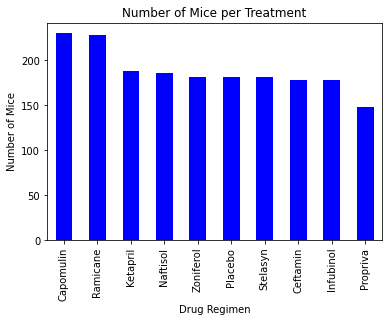

In [67]:
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

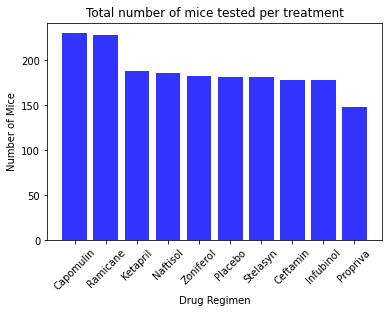

In [68]:
import matplotlib.pyplot as plt

# Assuming mice_count is a pandas Series with index as drug regimen names and values as the number of mice tested for each regimen
x_labels = mice_count.index.values
y_values = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_labels, y_values, color='b', alpha=0.8, align='center')

# Label the X-axis and Y-axis
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Set the title of the plot
plt.title("Total number of mice tested per treatment")

# Rotate the X-axis labels to make them easier to read
plt.xticks(rotation=45)

# Show the plot
plt.show()


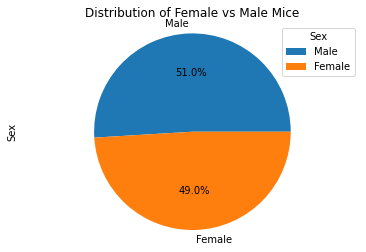

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by "Sex" and count the number of mice
sex_group = pyma_df_clean["Sex"].value_counts()

# Plot the pie chart
sex_group.plot(kind='pie', autopct='%1.1f%%')
# Make the plot an equal circle
plt.axis('equal')  
plt.legend(title="Sex")
plt.title("Distribution of Female vs Male Mice")
plt.show()



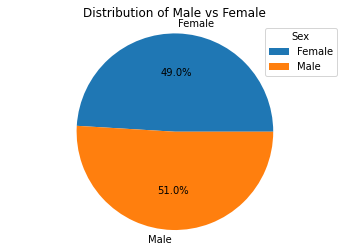

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by "Sex" and count the number of mice
sex_group = pyma_df_clean.groupby("Sex").count()["Mouse ID"]

# Get the labels and values for the pie chart
labels = np.array(sex_group.index)
values = np.array(sex_group.values)

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
 # Make the plot an equal circle
plt.axis('equal')  
plt.legend(title="Sex")
plt.title("Distribution of Male vs Female")
plt.show()





## Quartiles, Outliers and Boxplots

In [110]:
# Put treatments into a list (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
regimen_dict = {}

# Loop through the treatments
for treatment in treatments:
    # Get the DataFrame for the treatment
    treatment_df = regimen_dict[treatment]
    
    # Get the tumor volumes for the treatment
    treatment_tumor_volumes = treatment_df["Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = treatment_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = treatment_tumor_volumes[(treatment_tumor_volumes < lower_bound) | (treatment_tumor_volumes > upper_bound)]
    
    # Determine outliers using upper and lower bounds
    if len(outliers) > 0:
        print(f"Potential outliers found for {treatment}: {outliers.values}")
    
    # Add the tumor volumes for the treatment to the tumor_volumes list
    tumor_volumes.append(treatment_tumor_volumes)


KeyError: 'Capomulin'

In [72]:

# Create a list of the desired drug regimens
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Initialize a dictionary to store the DataFrames for each regimen
regimen_dict = {}

# Loop through the regimens and filter the clean_df DataFrame for each regimen
for regimen in regimens:
    regimen_dict[regimen] = pyma_df_clean[pyma_df_clean["Drug Regimen"] == regimen]


In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Create a list of the desired drug regimens
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Initialize a dictionary to store the DataFrames for each regimen
regimen_dict = {}

# Loop through the regimens and filter the clean_df DataFrame for each regimen
for regimen in regimens:
    regimen_dict[regimen] = pyma_df_clean[pyma_df_clean["Drug Regimen"] == regimen]


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pyma_df_clean.groupby("Mouse ID").max()["Timepoint"]
max_timepoint.rename('Timepoint'== 'Max Timepoint', inplace=True)
max_timepoint

# Merge the max_timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
pyma_df_clean['Max Timepoint'] = pyma_df_clean.groupby("Mouse ID")['Timepoint'].transform('max')
pyma_df_clean





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [88]:
#Final merged DF final Tumor Vol
tumor_vol_timepoint = pd.merge(max_timepoint, pyma_df_clean, on='Mouse ID', how='right')
tumor_vol_timepoint

,Mouse ID,False,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,a203,45,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,45,Infubinol,Female,20,23,5,48.508468,0,45
2,a203,45,Infubinol,Female,20,23,10,51.852437,1,45
3,a203,45,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,45,Infubinol,Female,20,23,20,55.173336,1,45
...,...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4,45


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumor_vol_data = pyma_df_clean["Tumor Volume (mm3)"]
quartiles = tumor_vol_data.describe()
lower_q = quartiles["25%"]
upper_q = quartiles["75%"]
iqr = upper_q - lower_q


print(f"The lower quartile occupancy is: {lower_q}")
print(f"The upper quartile occupancy is: {upper_q}")
print(f"The interquartile range of occupancy is: {iqr}")
#print(f"The median of occupancy is {quartiles[0.5]}")


lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.")
    

# Determine outliers using upper and lower bounds\
outliers = pyma_df[(pyma_df["Tumor Volume (mm3)"] < lower_bound) | 
                   (pyma_df["Tumor Volume (mm3)"] > upper_bound)]


The lower quartile occupancy is: 45.0
The upper quartile occupancy is: 56.32407510749999
The interquartile range of occupancy is: 11.324075107499993
Values below 28.01388733875001 could be outliers.
Values below 73.31018776874998 could be outliers.


In [90]:
# Put treatments into a list for for loop (and later for plot labels
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Initialize lists to store the statistics for each regimen
regimen_mean = []
regimen_median = []
regimen_variance = []
regimen_std_dev = []
regimen_sem = []

# Loop through each regimen
for regimen in regimens: ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df = pyma_df[pyma_df["Drug Regimen"] == regimen]
regimen_tumor_volumes = regimen_df["Tumor Volume (mm3)"]
    
# Calculate statistics for each regimen
mean = regimen_tumor_volumes.mean()
median = regimen_tumor_volumes.median()
variance = regimen_tumor_volumes.var()
std_dev = regimen_tumor_volumes.std()
sem = regimen_tumor_volumes.sem()
    
# Append results to the appropriate list
regimen_mean.append(mean)
regimen_median.append(median)
regimen_variance.append(variance)
regimen_std_dev.append(std_dev)
regimen_sem.append(sem)


In [91]:
outliers_list = []
for regimen in regimens:
    regimen_df = pyma_df[pyma_df["Drug Regimen"] == regimen]
    regimen_tumor_volumes = regimen_df["Tumor Volume (mm3)"]
    quartiles = regimen_tumor_volumes.describe()
    lower_q = quartiles["25%"]
    upper_q = quartiles["75%"]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    regimen_outliers = regimen_df[(regimen_df["Tumor Volume (mm3)"] < lower_bound) | 
                                   (regimen_df["Tumor Volume (mm3)"] > upper_bound)]
    outliers_list.extend(regimen_outliers)


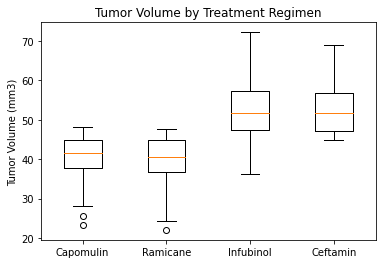

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

data = [pyma_df_clean[pyma_df_clean
                      
                      ['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in regimens]
ax1.boxplot(data, labels=regimens)
plt.show()


## Line and Scatter Plots

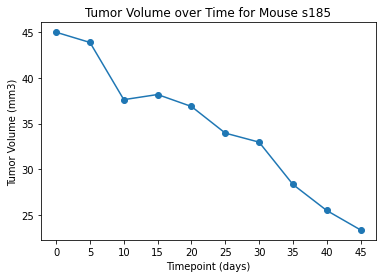

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# choose the first mouse treated with Capomulin
mouse = pyma_df_clean[pyma_df_clean['Drug Regimen'] == 'Capomulin'].iloc[0,0] 
# get data for the chosen mouse
mouse_df = pyma_df_clean[pyma_df_clean['Mouse ID'] == mouse] 

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], '-o')
plt.title('Tumor Volume over Time for Mouse ' + mouse)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(np.arange(0, mouse_df['Timepoint'].max()+5, 5))
plt.show()


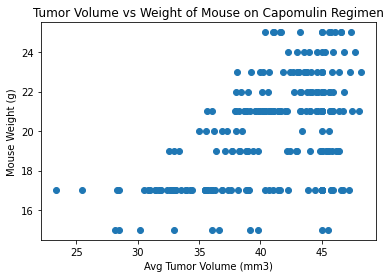

In [94]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capomulin_df = pyma_df_clean[pyma_df_clean['Drug Regimen'] == 'Capomulin']
plt.scatter(capomulin_df['Tumor Volume (mm3)'], capomulin_df['Weight (g)'])
plt.title("Tumor Volume vs Weight of Mouse on Capomulin Regimen")
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()



In [95]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,45
1439,r157,Capomulin,Male,22,25,0,45.000000,0,15
1440,r157,Capomulin,Male,22,25,5,45.597064,0,15
1441,r157,Capomulin,Male,22,25,10,46.059608,0,15


## Correlation and Regression

In [96]:
# Filter the data to only include the Capomulin regimen and find the mean
mean_tumor_volume = capomulin_df.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean().reset_index()
print(mean_tumor_volume)


   Mouse ID  Tumor Volume (mm3)
0      b128           41.963636
1      b742           40.083699
2      f966           36.505973
3      g288           41.990097
4      g316           44.613344
5      i557           44.805810
6      i738           39.141053
7      j119           44.465236
8      j246           43.216925
9      l509           44.434474
10     l897           42.507261
11     m601           34.847470
12     m957           39.049816
13     r157           45.798970
14     r554           36.509212
15     r944           43.367364
16     s185           34.559143
17     s710           42.803733
18     t565           39.328725
19     u364           39.887495
20     v923           41.581595
21     w150           41.384825
22     w914           41.352452
23     x401           36.182040
24     y793           38.506829


In [123]:
# Add the average tumor volume to the dataframe
capomulin_final = pd.merge(capomulin_df, mean_tumor_volume, on='Mouse ID', how='left')

#Rename Columns
capomulin_final.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)', 'Tumor Volume (mm3)_y': 'Mean Tumor Volume'})
capomulin_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Max Timepoint,Tumor Volume (mm3)_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,45,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,45,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,45,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,45,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,45,34.559143
...,...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,45,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,15,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,15,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,15,45.798970


In [124]:
# Compute the correlation between mouse weight and average tumor volume
correlation = capomulin_final["Weight (g)"].corr(capomulin_final["Tumor Volume (mm3)_y"])

print("The correlation coefficient between mouse weight and average tumor volume is:", correlation)

The correlation coefficient between mouse weight and average tumor volume is: 0.8343958614425966


####Close to 1 indicates a strong positive correlation

In [125]:
capomulin_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Max Timepoint,Tumor Volume (mm3)_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,45,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,45,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,45,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,45,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,45,34.559143
...,...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,45,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,15,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,15,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,15,45.798970


In [145]:
#Group by mouse id
capomulin_final = capomulin_final.groupby(['Mouse ID']).mean()
#Reset index
capomulin_final_df = capomulin_final.reset_index().copy()
#Create new DF
capomulin_final_df = capomulin_final_df.rename(columns={'Tumor Volume (mm3)_y': 'Mean Tumor Volume (mm3)'})



final_result = pd.merge(capomulin_final_df[capomulin_final])

KeyError: "None of [Float64Index([41.963635634000006,       40.083699304,        36.50597276,\n                    41.990096606,       44.613343896,  44.80580968499999,\n               39.14105274999999,       44.465236345,     43.21692460875,\n               44.43447378999999, 42.507261035000006,       34.847469897,\n                    39.049816448, 45.798969507500004,  36.50921204600001,\n               43.36736445299999,  34.55914339499999,       42.803733044,\n                    39.328725099,  39.88749519099999,       41.581595101,\n              41.384825209999995, 41.352452281000005,       36.182039562,\n               38.50682924800001],\n             dtype='float64')] are in the [columns]"

In [143]:
#linear regression
slope, intercept = np.polyfit(capomulin_final['Weight(g)'], capomulin_final_df['Mean Tumor Volume (mm3)'], 1)

#Create function for line of best fit
def line_of_best_fit(x):
    return slope * x + intercept


#Plot the relationship between mouse weight and average tumor volume with the line of best fit


plt.scatter(x=capomulin_final['Weight(g)'], y=capomulin_final_df['Mean Tumor Volume (mm3)'])
x = np.linspace(capomulin_final['Weight(g)'].min(), capomulin_final['Weight(g)'].max(), 100)
y = line_of_best_fit(x)
plt.plot(x, y, color='red')
plt.xlabel('Weight(g)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Mouse weight vs. average tumor volume for the Capomulin regimen with line of best fit')
plt.show()

KeyError: 'Weight(g)'